https://mccormickml.com/2019/07/22/BERT-fine-tuning/

https://luv-bansal.medium.com/fine-tuning-bert-for-text-classification-in-pytorch-503d97342db2

### 1. K-means Clustering Algorithm from Scratch

(300, 2) [[0.42857674 4.9739971 ]
 [1.61990909 0.06764529]
 [1.43289271 4.37679234]]


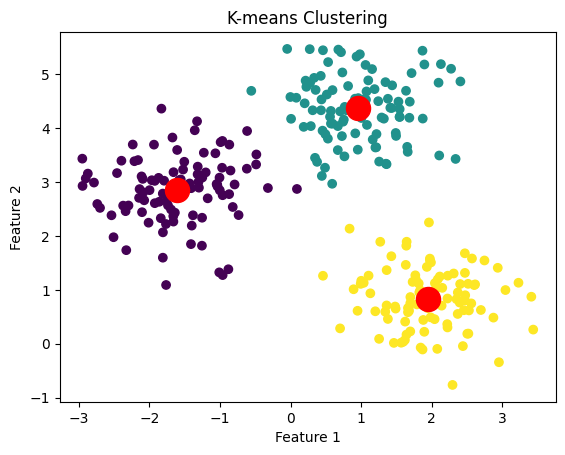

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_centroids(X, k):
    """Randomly initialize centroids from the dataset."""
    np.random.seed(42)
    random_indices = np.random.permutation(X.shape[0])
    centroids = X[random_indices[:k]]
    return centroids

def compute_distances(X, centroids):
    """Compute the distance between each data point and the centroids."""
    distances = np.zeros((X.shape[0], centroids.shape[0]))
    for i, centroid in enumerate(centroids):
        distances[:, i] = np.linalg.norm(X - centroid, axis=1)
    return distances

def assign_clusters(distances):
    """Assign each data point to the closest centroid."""
    return np.argmin(distances, axis=1)

def compute_centroids(X, labels, k):
    """Compute the new centroids as the mean of all data points assigned to each cluster."""
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        centroids[i, :] = X[labels == i].mean(axis=0)
    return centroids

def kmeans(X, k, max_iters=100):
    """K-means clustering algorithm."""
    centroids = initialize_centroids(X, k)
    
    for i in range(max_iters):
        old_centroids = centroids
        distances = compute_distances(X, centroids)
        labels = assign_clusters(distances)
        centroids = compute_centroids(X, labels, k)
        
        # If centroids do not change, we have converged
        if np.all(centroids == old_centroids):
            break
    
    return centroids, labels

# Example usage
if __name__ == "__main__":
    # Generate some synthetic data
    from sklearn.datasets import make_blobs
    X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)
    print(X.shape, X[:3])

    # Run the K-means algorithm
    k = 3
    centroids, labels = kmeans(X, k)

    # Visualize the results
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red')  # Centroids
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('K-means Clustering')
    plt.show()

Explanation of the Code:
1. initialize_centroids: Randomly selects k data points from the dataset as initial centroids.
2. compute_distances: Calculates the Euclidean distance between each data point and each centroid.
3. assign_clusters: Assigns each data point to the closest centroid based on the computed distances.
4. compute_centroids: Recalculates the centroids by taking the mean of all data points assigned to each cluster.
5. kmeans: The main function that runs the K-means clustering algorithm, iteratively updating centroids and cluster assignments until convergence or reaching the maximum number of iterations.

Example Usage:
- The make_blobs function generates synthetic data with three clusters.
- The K-means algorithm is applied to the data, and the results are visualized with the final cluster assignments and centroids.

This is a basic implementation and can be further optimized or extended to include additional features such as better initialization techniques (e.g., K-means++), convergence criteria, or more complex distance metrics.

### K-means++ Clustering Algorithm from Scratch

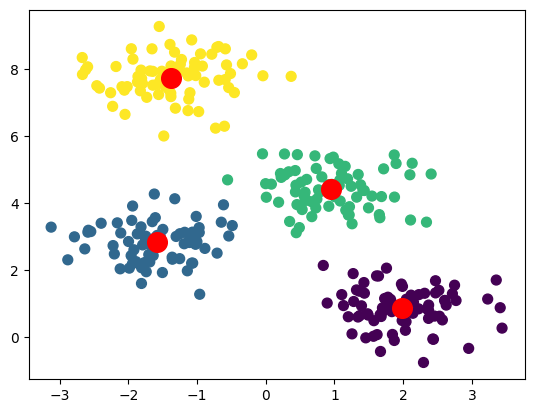

In [5]:
import numpy as np

class KMeansPP:
    def __init__(self, n_clusters, max_iter=300, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.centroids = None

    def initialize_centroids(self, X):
        n_samples, _ = X.shape
        centroids = np.zeros((self.n_clusters, X.shape[1]))
        
        # Choose the first centroid randomly
        centroids[0] = X[np.random.choice(n_samples)]
        
        # Choose the remaining centroids
        for i in range(1, self.n_clusters):
            # Compute distances from the closest centroids
            distances = np.min([np.linalg.norm(X - centroids[j], axis=1) for j in range(i)], axis=0)
            probabilities = distances / np.sum(distances)
            cumulative_probabilities = np.cumsum(probabilities)
            r = np.random.rand()
            index = np.where(cumulative_probabilities >= r)[0][0]
            centroids[i] = X[index]
        
        return centroids

    def fit(self, X):
        n_samples, _ = X.shape
        self.centroids = self.initialize_centroids(X)

        for _ in range(self.max_iter):
            # Assignment step: Assign samples to the nearest centroid
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            clusters = np.argmin(distances, axis=1)

            # Update step: Compute new centroids as the mean of samples in each cluster
            new_centroids = np.array([X[clusters == j].mean(axis=0) for j in range(self.n_clusters)])

            # Check for convergence
            if np.linalg.norm(self.centroids - new_centroids) < self.tol:
                break

            self.centroids = new_centroids

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

# Example usage
if __name__ == "__main__":
    from sklearn.datasets import make_blobs

    # Generate some random data
    X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

    # Apply K-means++
    kmeans = KMeansPP(n_clusters=4)
    kmeans.fit(X)
    clusters = kmeans.predict(X)

    # Visualize the result
    import matplotlib.pyplot as plt

    plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')
    plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s=200, c='red')
    plt.show()

Key Points:
- Initialization with K-means++: The centroids are initialized more thoughtfully than in standard K-means, leading to better results.
- Assignment Step: Each point is assigned to the nearest centroid.
- Update Step: Centroids are updated as the mean of points in their cluster.
- Convergence: The algorithm stops when the centroids no longer move significantly or after a maximum number of iterations.
This implementation will generally lead to better and more consistent clustering results compared to the standard K-means due to the improved initialization step.

Explanation:
- Distance Calculation:
The distance calculation is fixed by ensuring that the shapes of X and centroids are compatible. The expression X[:, np.newaxis] - self.centroids reshapes X to (n_samples, 1, n_features) and self.centroids to (1, n_clusters, n_features) for proper broadcasting, leading to a final shape of (n_samples, n_clusters, n_features).
- Centroid Initialization:
The centroid initialization now correctly uses the first centroid and calculates the subsequent centroids based on the probability distribution proportional to the square of the minimum distance to the existing centroids.
- Cluster Assignment:
The fit method computes the distances between each data point and the centroids, assigns each point to the nearest centroid, and then updates the centroids by calculating the mean of the points assigned to each cluster.

### 2. K-Nearest Neighbors (k-NN) Algorithm from Scratch

In [14]:
from sklearn.datasets import make_classification

# Total number of features
n_features = 10

# Number of informative, redundant, and repeated features
n_informative = 5
n_redundant = 2
n_repeated = 1

# The sum of informative, redundant, and repeated features must be <= n_features
# In this case, 5 + 2 + 1 = 8, which is less than 10 (n_features)
X, y = make_classification(
    n_samples=100, 
    n_features=n_features, 
    n_informative=n_informative, 
    n_redundant=n_redundant, 
    n_repeated=n_repeated,
    n_classes=2,
    random_state=42
)

print(f"Feature matrix shape: {X.shape}")
print(f"Labels shape: {y.shape}")

Feature matrix shape: (100, 10)
Labels shape: (100,)


In [16]:
y

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1])

The error you're encountering usually arises when you're generating a synthetic dataset using a function like make_classification from the sklearn.datasets module. This function requires that the sum of informative, redundant, and repeated features should be less than or equal to the total number of features. Let's clarify how to avoid this error.

Explanation:
- Informative Features: These are features that are actually used to construct the decision boundary in the classification task.
- Redundant Features: These are linear combinations of the informative features.
- Repeated Features: These are duplicates of some features.

When you specify the number of informative, redundant, and repeated features, their sum must be less than or equal to the total number of features you are generating.

Accuracy: 86.67%


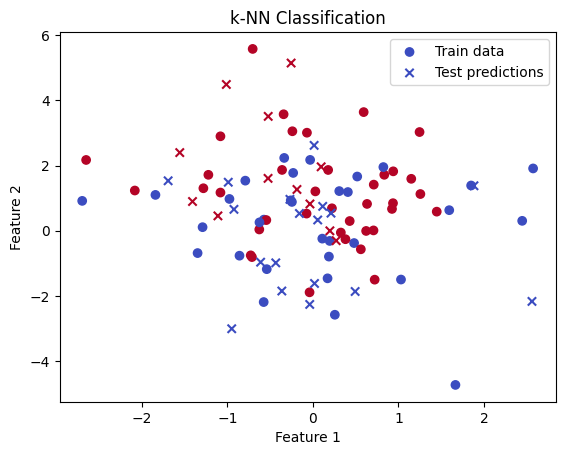

In [4]:
import numpy as np
from collections import Counter

def euclidean_distance(x1, x2):
    """Calculate the Euclidean distance between two data points."""
    return np.sqrt(np.sum((x1 - x2) ** 2))

def knn(X_train, y_train, X_test, k=3):
    """k-Nearest Neighbors algorithm.
    
    Parameters:
    X_train: np.ndarray - Training data features.
    y_train: np.ndarray - Training data labels.
    X_test: np.ndarray - Test data features.
    k: int - Number of neighbors to consider.
    
    Returns:
    np.ndarray - Predicted labels for the test data.
    """
    predictions = []
    
    for x_test in X_test:
        # Compute distances from x_test to all training samples
        distances = [euclidean_distance(x_test, x_train) for x_train in X_train]
        
        # Get the indices of the k closest neighbors
        k_indices = np.argsort(distances)[:k]
        
        # Get the labels of the k closest neighbors
        k_nearest_labels = [y_train[i] for i in k_indices]
        
        # Determine the most common label among the k neighbors
        most_common = Counter(k_nearest_labels).most_common(1)
        predictions.append(most_common[0][0])
    
    return np.array(predictions)

# Example usage
if __name__ == "__main__":
    # Generate some synthetic data for classification
    from sklearn.datasets import make_classification
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score

    # Create a synthetic dataset
    # X, y = make_classification(n_samples=200, n_features=2, n_classes=2, random_state=42)
    
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Run the k-NN algorithm
    k = 3
    predictions = knn(X_train, y_train, X_test, k)

    # Evaluate the accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Plot the data and the decision boundary
    import matplotlib.pyplot as plt
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', label='Train data')
    plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, marker='x', cmap='coolwarm', label='Test predictions')
    plt.title("k-NN Classification")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()
    plt.show()

Key Points:
- n_features: The total number of features you want in your dataset.
- n_informative, n_redundant, n_repeated: These must sum to less than or equal to n_features.
- n_classes: The number of classes in your dataset.

In this example, we set n_features to 10, with 5 informative features, 2 redundant features, and 1 repeated feature, which sums up to 8. This is less than the total number of features (10), so the code runs without error.

Explanation of the Code:
1. euclidean_distance: A function that computes the Euclidean distance between two data points. This is the most common distance metric used in KNN.

2. knn_predict:
    - X_train: The training data features.
    - y_train: The corresponding labels for the training data.
    - X_test: The test data features that you want to classify.
    - k: The number of nearest neighbors to consider when making predictions.

    For each test data point:
    - The distance between the test point and every training point is computed.
    - The distances are sorted, and the labels of the k nearest neighbors are identified.
    - The most common label among the k nearest neighbors is assigned to the test point (majority voting).

3. Example Usage:
- A small synthetic dataset is created for demonstration purposes.
- The knn_predict function is used to predict the classes for a couple of test samples.

Notes:
- This implementation is simple and lacks optimizations such as using KD-trees or Ball trees for faster neighbor searches.
- The algorithm is designed for classification tasks, where the goal is to assign a class label to each test point based on the majority class among its nearest neighbors.

### 3. Gradient Descent Algorithm

In [3]:
import numpy as np

# Define the hypothesis function for linear regression
def hypothesis(X, theta):
    return X.dot(theta)

# Define the cost function (Mean Squared Error)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = hypothesis(X, theta)
    cost = (1/2*m) * np.sum(np.square(predictions - y))
    return cost

# Define the gradient descent algorithm
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    cost_history = np.zeros(num_iterations)
    
    for i in range(num_iterations):
        # Calculate the gradient
        gradient = (1/m) * X.T.dot(hypothesis(X, theta) - y)
        
        # Update the parameters
        theta = theta - alpha * gradient
        
        # Save the cost at each iteration
        cost_history[i] = compute_cost(X, y, theta)
    
    return theta, cost_history

# Example usage
# Suppose we have some data points (X, y)
X = np.array([[1, 1], [1, 2], [1, 3], [1, 4]])  # 4 data points, with the first column as the bias term
y = np.array([2, 3, 4, 5])

# Initialize the parameters (theta_0, theta_1)
theta = np.zeros(2)

# Set the learning rate and number of iterations
alpha = 0.01
num_iterations = 1000

# Perform gradient descent
theta, cost_history = gradient_descent(X, y, theta, alpha, num_iterations)

print("Optimized parameters:", theta)
print("Cost after final iteration:", cost_history[-1])

Optimized parameters: [0.86777362 1.04497309]
Cost after final iteration: 0.023360098605444073


第二道code：手写bootstrap算法，补全code块（不准对已有code任何改动）。给你多个sklearn的classifiers，x和y。输出经过majority voting后的predicted y。

In [4]:
from random import randint, seed
from sklearn.tree import DecisionTreeClassifier
import numpy as np

def bootstrap(n: int) -> list[int]:
    """
    Step 1: Bootstrap the train samples for each base classifier.
    """
    indices = [randint(0, n-1) for _ in range(n)]
    return indices

def fit(classifiers: list[DecisionTreeClassifier], x: list[list[float]], y: list[int]):
    """
    Step 2: Train each classifier based on its own bootstrapped samples.
    """
    n_samples = len(x)
    for clf in classifiers:
        indices = bootstrap(n_samples)
        x_bootstrapped = [x[i] for i in indices]
        y_bootstrapped = [y[i] for i in indices]
        clf.fit(x_bootstrapped, y_bootstrapped)

def predict(classifiers: list[DecisionTreeClassifier], x: list[list[float]]) -> list[int]:
    """
    Step 3: Assign class labels by a majority vote of the base classifiers.
    """
    predictions = np.array([clf.predict(x) for clf in classifiers])
    # Majority vote
    final_predictions = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions)
    return final_predictions.tolist()

def solution(x_train: list[list[float]], y_train: list[int], x_test: list[list[float]], n_estimators: int) -> list[int]:
    """
    Step 4: Pull everything together
    """
    seed(42)
    classifiers = [DecisionTreeClassifier(random_state=0) for _ in range(n_estimators)]
    fit(classifiers, x_train, y_train)
    return predict(classifiers, x_test)

### 4. Implementation of Self-Attention

https://sebastianraschka.com/blog/2023/self-attention-from-scratch.html

In [ ]:
import numpy as np

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

def self_attention(Q, K, V):
    """
    Q: Query matrix (batch_size, seq_length, d_k)
    K: Key matrix (batch_size, seq_length, d_k)
    V: Value matrix (batch_size, seq_length, d_v)
    Returns: Self-attention output (batch_size, seq_length, d_v)
    """
    # Compute the dot product between Query and Key (scaled by sqrt(d_k))
    d_k = Q.shape[-1]
    scores = np.matmul(Q, K.transpose(0, 2, 1)) / np.sqrt(d_k)
    
    # Apply softmax to get the attention weights
    attention_weights = softmax(scores)
    
    # Compute the weighted sum of the Value vectors
    attention_output = np.matmul(attention_weights, V)
    
    return attention_output, attention_weights

# Example usage:
# Let's assume we have a sequence of 3 words, each represented by a 4-dimensional vector
batch_size = 1
seq_length = 3
d_k = d_v = 4

# Randomly initialize Q, K, V matrices
Q = np.random.rand(batch_size, seq_length, d_k)
K = np.random.rand(batch_size, seq_length, d_k)
V = np.random.rand(batch_size, seq_length, d_v)

# Compute self-attention
attention_output, attention_weights = self_attention(Q, K, V)

print("Attention Output:\n", attention_output)
print("Attention Weights:\n", attention_weights)

In [18]:
sentence = 'I like machine learning'

dc = {s:i for i,s in enumerate(sorted(sentence.replace(',', '').split()))}
print(dc)

{'I': 0, 'learning': 1, 'like': 2, 'machine': 3}


In [19]:
import torch

sentence_int = torch.tensor([dc[s] for s in sentence.replace(',', '').split()])
print(sentence_int)

tensor([0, 2, 3, 1])


In [20]:
torch.manual_seed(123)
embed = torch.nn.Embedding(4, 3)
embedded_sentence = embed(sentence_int).detach()

print(embedded_sentence)
print(embedded_sentence.shape)

tensor([[-0.1115,  0.1204, -0.3696],
        [-0.9724, -0.7550,  0.3239],
        [-0.1085,  0.2103, -0.3908],
        [-0.2404, -1.1969,  0.2093]])
torch.Size([4, 3])


In [21]:
torch.manual_seed(123)

d = embedded_sentence.shape[1]

d_q, d_k, d_v = 6, 6, 6

W_query = torch.nn.Parameter(torch.rand(d_q, d))
W_key = torch.nn.Parameter(torch.rand(d_k, d))
W_value = torch.nn.Parameter(torch.rand(d_v, d))

In [29]:
W_query, W_key, W_value

(Parameter containing:
 tensor([[0.2961, 0.5166, 0.2517],
         [0.6886, 0.0740, 0.8665],
         [0.1366, 0.1025, 0.1841],
         [0.7264, 0.3153, 0.6871],
         [0.0756, 0.1966, 0.3164],
         [0.4017, 0.1186, 0.8274]], requires_grad=True),
 Parameter containing:
 tensor([[0.3821, 0.6605, 0.8536],
         [0.5932, 0.6367, 0.9826],
         [0.2745, 0.6584, 0.2775],
         [0.8573, 0.8993, 0.0390],
         [0.9268, 0.7388, 0.7179],
         [0.7058, 0.9156, 0.4340]], requires_grad=True),
 Parameter containing:
 tensor([[0.0772, 0.3565, 0.1479],
         [0.5331, 0.4066, 0.2318],
         [0.4545, 0.9737, 0.4606],
         [0.5159, 0.4220, 0.5786],
         [0.9455, 0.8057, 0.6775],
         [0.6087, 0.6179, 0.6932]], requires_grad=True))

In [36]:
x_2 = embedded_sentence[1]
print(x_2)

query_2 = W_query.matmul(x_2)
key_2 = W_key.matmul(x_2)
value_2 = W_value.matmul(x_2)

print(query_2)
print(query_2.shape)
print(key_2.shape)
print(value_2.shape)

tensor([-0.9724, -0.7550,  0.3239])
tensor([-0.5964, -0.4447, -0.1506, -0.7218, -0.1195, -0.2122],
       grad_fn=<MvBackward0>)
torch.Size([6])
torch.Size([6])
torch.Size([6])


In [23]:
keys = W_key.matmul(embedded_sentence.T).T
values = W_value.matmul(embedded_sentence.T).T

print("keys.shape:", keys.shape)
print("values.shape:", values.shape)

keys.shape: torch.Size([4, 6])
values.shape: torch.Size([4, 6])


In [25]:
omega_24 = query_2.dot(keys[2])
print(omega_24)

tensor(0.2607, grad_fn=<DotBackward0>)


In [26]:
omega_2 = query_2.matmul(keys.T)
print(omega_2)

tensor([0.3932, 2.2762, 0.2607, 2.1340], grad_fn=<SqueezeBackward4>)


In [27]:
import torch.nn.functional as F

attention_weights_2 = F.softmax(omega_2 / d_k**0.5, dim=0)
print(attention_weights_2)

tensor([0.1629, 0.3513, 0.1543, 0.3315], grad_fn=<SoftmaxBackward0>)


In [28]:
context_vector_2 = attention_weights_2.matmul(values)

print(context_vector_2.shape)
print(context_vector_2)

torch.Size([6])
tensor([-0.2434, -0.4767, -0.7725, -0.4565, -0.8804, -0.6112],
       grad_fn=<SqueezeBackward4>)


In [34]:
querys = W_query.matmul(embedded_sentence.T).T
omega = querys.matmul(keys.T)
attention_weights = F.softmax(omega / d_k**0.5, dim=0)
context_vector = attention_weights.matmul(values)

print(context_vector.shape)
print(context_vector)

torch.Size([4, 6])
tensor([[-0.1619, -0.3339, -0.5254, -0.3572, -0.6402, -0.4648],
        [-0.2329, -0.4680, -0.7475, -0.4772, -0.8828, -0.6287],
        [-0.1585, -0.3275, -0.5149, -0.3514, -0.6287, -0.4570],
        [-0.1688, -0.3463, -0.5468, -0.3690, -0.6633, -0.4809]],
       grad_fn=<MmBackward0>)


### 5. Newton's Method

In [5]:
def newton_method(f, df, x0, tolerance=1e-7, max_iter=1000):
    """
    Newton's method for finding roots of a function.
    
    Parameters:
    f : function
        The function whose root we want to find.
    df : function
        The derivative of the function.
    x0 : float
        The initial guess for the root.
    tolerance : float, optional
        The stopping criteria for the method (default is 1e-7).
    max_iter : int, optional
        The maximum number of iterations allowed (default is 1000).
    
    Returns:
    x : float
        The estimated root of the function.
    iter_count : int
        The number of iterations performed.
    """
    
    x = x0
    iter_count = 0
    
    for i in range(max_iter):
        iter_count += 1
        x_new = x - f(x) / df(x)
        
        # Check if the change is within the specified tolerance
        if abs(x_new - x) < tolerance:
            return x_new, iter_count
        
        x = x_new
    
    raise ValueError("Newton's method did not converge after {} iterations".format(max_iter))

# Example usage:
# Function: f(x) = x^2 - 2 (we want to find the square root of 2)
# Derivative: f'(x) = 2x

def f(x):
    return x**2 - 2

def df(x):
    return 2 * x

# Initial guess
x0 = 1.0

# Run Newton's method
root, iterations = newton_method(f, df, x0)

print("Estimated root:", root)
print("Number of iterations:", iterations)

Estimated root: 1.4142135623730951
Number of iterations: 5


# CLT验证与置信区间计算

中心极限定理说：

当我们重复抽样并计算样本均值时，这些样本均值的分布会接近正态分布

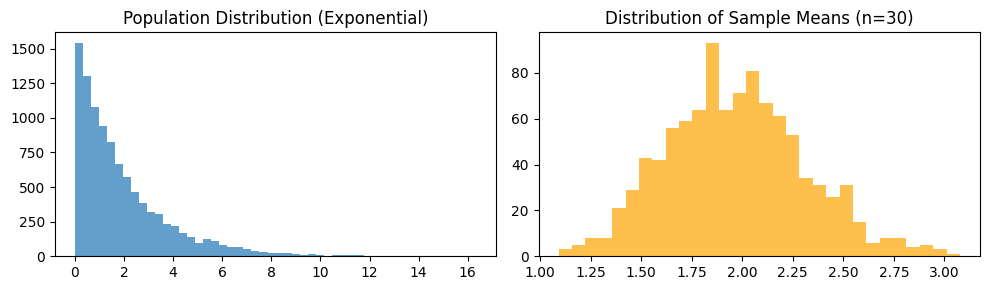

Sample mean: 1.804
95% Confidence Interval: [1.404, 2.204]
True population mean: 1.955
Interval contains true mean: True


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Create non-normal population
np.random.seed(42)
pop = np.random.exponential(2, 10000)

# 2. Sample and calculate means
sample_means = [np.mean(np.random.choice(pop, 30)) for _ in range(1000)]

# 3. Visualize comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
ax1.hist(pop, bins=50, alpha=0.7)
ax1.set_title('Population Distribution (Exponential)')
ax2.hist(sample_means, bins=30, alpha=0.7, color='orange')
ax2.set_title('Distribution of Sample Means (n=30)')
plt.tight_layout()
plt.show()

# 4. Calculate a confidence interval
sample = np.random.choice(pop, 100)
mean, std = np.mean(sample), np.std(sample, ddof=1)
se = std / np.sqrt(100)
ci = (mean - 1.96 * se, mean + 1.96 * se)

print(f"Sample mean: {mean:.3f}")
print(f"95% Confidence Interval: [{ci[0]:.3f}, {ci[1]:.3f}]")
print(f"True population mean: {np.mean(pop):.3f}")
print(f"Interval contains true mean: {ci[0] <= np.mean(pop) <= ci[1]}")

1. Creating right-skewed exponential distribution population...
   Population mean μ = 1.955
   Population standard deviation σ = 1.949
   Population skewness = 1.919

2. Simulating sampling: Drawing 1000 samples, each with n=30...

3. Verifying CLT theoretical predictions...
   Theoretical prediction: Sample mean distribution ~ N(μ=1.955, SE=0.356)
   Actual results: Mean=1.968, Std=0.343
   Differences: Mean diff=0.013, SE diff=0.013

4. Visual verification...


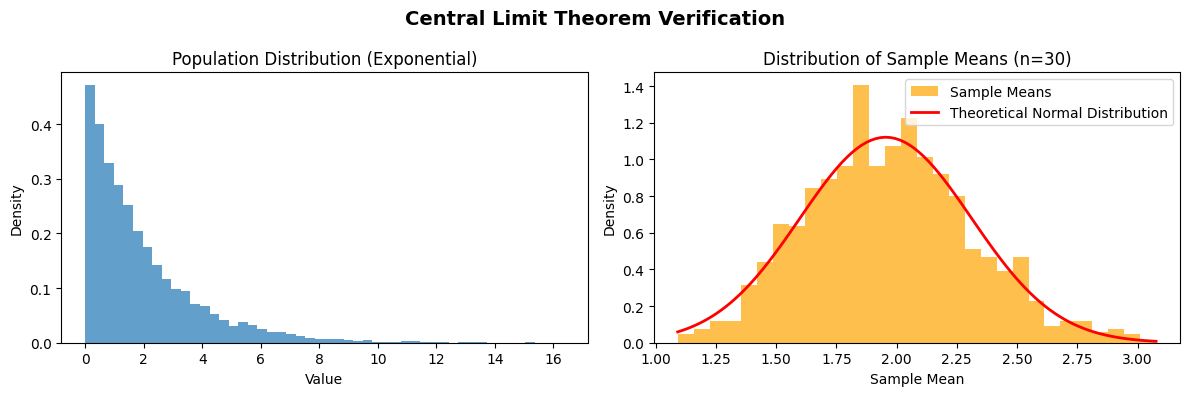


5. Confidence interval calculation example...
   Drawing one sample from population (n=100):
   Sample mean = 1.804
   Sample standard deviation = 2.042
   Standard error = 0.204

   95% Confidence Interval:
   1.804 ± 1.960 × 0.204
   = 1.804 ± 0.400
   = [1.404, 2.204]
   ✓ Confidence interval contains population mean 1.955

6. Comparison of different confidence levels:
   90% CI: [1.468, 2.140] (Width: 0.672)
   95% CI: [1.404, 2.204] (Width: 0.800)
   99% CI: [1.278, 2.330] (Width: 1.052)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# 1. Set random seed and parameters
np.random.seed(42)
population_size = 10000
sample_size = 30
n_samples = 1000

# 2. Create non-normal population (exponential distribution)
print("1. Creating right-skewed exponential distribution population...")
population = np.random.exponential(scale=2, size=population_size)
pop_mean = np.mean(population)
pop_std = np.std(population)

print(f"   Population mean μ = {pop_mean:.3f}")
print(f"   Population standard deviation σ = {pop_std:.3f}")
print(f"   Population skewness = {stats.skew(population):.3f}")

# 3. Simulate sampling process
print(f"\n2. Simulating sampling: Drawing {n_samples} samples, each with n={sample_size}...")
sample_means = []

for i in range(n_samples):
    sample = np.random.choice(population, size=sample_size)
    sample_means.append(np.mean(sample))

sample_means = np.array(sample_means)

# 4. Verify CLT theoretical values
print(f"\n3. Verifying CLT theoretical predictions...")
theoretical_mean = pop_mean
theoretical_se = pop_std / np.sqrt(sample_size)

actual_mean = np.mean(sample_means)
actual_std = np.std(sample_means)

print(f"   Theoretical prediction: Sample mean distribution ~ N(μ={theoretical_mean:.3f}, SE={theoretical_se:.3f})")
print(f"   Actual results: Mean={actual_mean:.3f}, Std={actual_std:.3f}")
print(f"   Differences: Mean diff={abs(actual_mean-theoretical_mean):.3f}, SE diff={abs(actual_std-theoretical_se):.3f}")

# 5. Visualization
print(f"\n4. Visual verification...")
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Left plot: Population distribution
axes[0].hist(population, bins=50, density=True, alpha=0.7)
axes[0].set_title(f'Population Distribution (Exponential)')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Density')

# Right plot: Sample means distribution + theoretical normal curve
axes[1].hist(sample_means, bins=30, density=True, alpha=0.7, color='orange', label='Sample Means')

# Add theoretical normal curve
x = np.linspace(min(sample_means), max(sample_means), 100)
y = stats.norm.pdf(x, theoretical_mean, theoretical_se)
axes[1].plot(x, y, 'r-', linewidth=2, label='Theoretical Normal Distribution')

axes[1].set_title(f'Distribution of Sample Means (n={sample_size})')
axes[1].set_xlabel('Sample Mean')
axes[1].set_ylabel('Density')
axes[1].legend()

plt.suptitle('Central Limit Theorem Verification', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# 6. Confidence interval calculation
print(f"\n5. Confidence interval calculation example...")

# Draw one specific sample
one_sample = np.random.choice(population, size=100)
sample_mean = np.mean(one_sample)
sample_std = np.std(one_sample, ddof=1)  # Sample standard deviation

# Calculate 95% confidence interval
confidence_level = 0.95
z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)  # For large samples, use z
se = sample_std / np.sqrt(len(one_sample))
margin_of_error = z_score * se
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error

print(f"   Drawing one sample from population (n=100):")
print(f"   Sample mean = {sample_mean:.3f}")
print(f"   Sample standard deviation = {sample_std:.3f}")
print(f"   Standard error = {se:.3f}")
print(f"\n   {confidence_level*100:.0f}% Confidence Interval:")
print(f"   {sample_mean:.3f} ± {z_score:.3f} × {se:.3f}")
print(f"   = {sample_mean:.3f} ± {margin_of_error:.3f}")
print(f"   = [{ci_lower:.3f}, {ci_upper:.3f}]")

# Check if it contains the true population mean
if ci_lower <= pop_mean <= ci_upper:
    print(f"   ✓ Confidence interval contains population mean {pop_mean:.3f}")
else:
    print(f"   ✗ Confidence interval does NOT contain population mean {pop_mean:.3f}")

# 7. Comparison of different confidence levels (optional, if time permits)
print(f"\n6. Comparison of different confidence levels:")
for cl in [0.90, 0.95, 0.99]:
    z = stats.norm.ppf(1 - (1 - cl) / 2)
    margin = z * se
    lower = sample_mean - margin
    upper = sample_mean + margin
    print(f"   {cl*100:.0f}% CI: [{lower:.3f}, {upper:.3f}] (Width: {upper-lower:.3f})")

### 6. Creating a custom PyTorch layer with a forward and backward pass using NumPy

In [6]:
import torch
import numpy as np

class CustomLayerFunction(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input):
        # Convert input to numpy array
        input_np = input.detach().numpy()
        
        # Example operation: square the input
        output_np = np.square(input_np)
        
        # Save the input for backward computation
        ctx.save_for_backward(input)
        
        # Convert the result back to torch.Tensor and return
        return torch.tensor(output_np, dtype=input.dtype, device=input.device)
    
    @staticmethod
    def backward(ctx, grad_output):
        # Retrieve saved input
        input, = ctx.saved_tensors
        
        # Convert to numpy array
        input_np = input.detach().numpy()
        grad_output_np = grad_output.detach().numpy()
        
        # Example gradient computation: derivative of x^2 is 2x
        grad_input_np = 2 * input_np * grad_output_np
        
        # Convert gradient back to torch.Tensor and return
        return torch.tensor(grad_input_np, dtype=input.dtype, device=input.device)

class CustomLayer(torch.nn.Module):
    def __init__(self):
        super(CustomLayer, self).__init__()
    
    def forward(self, input):
        return CustomLayerFunction.apply(input)

# Example usage
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
layer = CustomLayer()
y = layer(x)
y.sum().backward()

print(x.grad)  # Should print: tensor([2.0000, 4.0000, 6.0000])

tensor([2., 4., 6.])


### Implementation of a Forward Neural Network in Python

In [10]:
import numpy as np

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Initialize parameters
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(1)
    W1 = np.random.randn(input_size, hidden_size) * 0.01
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) * 0.01
    b2 = np.zeros((1, output_size))
    return W1, b1, W2, b2

# Forward propagation
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(X, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = Z2  # Linear activation for output layer (no activation function)
    return Z1, A1, Z2, A2

# Compute loss (Mean Squared Error)
def compute_loss(Y, A2):
    m = Y.shape[0]
    loss = np.sum((Y - A2) ** 2) / (2 * m)
    return loss

# Backward propagation
def backward_propagation(X, Y, Z1, A1, A2, W2):
    m = X.shape[0]
    
    dZ2 = A2 - Y  # Derivative of loss with respect to Z2
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(Z1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m
    
    return dW1, db1, dW2, db2

# Update parameters
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate=0.01):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

# Example of usage
def train_neural_network(X, Y, hidden_size, iterations, learning_rate):
    input_size = X.shape[1]
    output_size = Y.shape[1]
    
    W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)
    
    for i in range(iterations):
        # Forward propagation
        Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)
        
        # Compute loss
        loss = compute_loss(Y, A2)
        if i % 1000 == 0:
            print(f"Iteration {i}, Loss: {loss}")
        
        # Backward propagation
        dW1, db1, dW2, db2 = backward_propagation(X, Y, Z1, A1, A2, W2)
        
        # Update parameters
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
    
    return W1, b1, W2, b2

# Predict
def predict(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(X, W1, b1, W2, b2)
    return A2

# Data (Example: y = 2x + 3)
X = np.array([[1], [2], [3], [4]])
Y = np.array([[5], [7], [9], [11]])

# Train the network
hidden_size = 2
iterations = 10000
learning_rate = 0.01

W1, b1, W2, b2 = train_neural_network(X, Y, hidden_size, iterations, learning_rate)

# Make predictions
predictions = predict(X, W1, b1, W2, b2)
print("Predictions:")
print(predictions)

Iteration 0, Loss: 34.56419102062565
Iteration 1000, Loss: 0.1457003346175174
Iteration 2000, Loss: 0.013733505881784128
Iteration 3000, Loss: 0.007039140369500527
Iteration 4000, Loss: 0.005697670892086583
Iteration 5000, Loss: 0.005273046787929187
Iteration 6000, Loss: 0.00509230354895157
Iteration 7000, Loss: 0.004987618110824561
Iteration 8000, Loss: 0.004909244310772196
Iteration 9000, Loss: 0.004840940673670657
Predictions:
[[ 5.06952777]
 [ 6.86815814]
 [ 9.11626724]
 [10.95018273]]


In [11]:
X, Y

(array([[1],
        [2],
        [3],
        [4]]),
 array([[ 5],
        [ 7],
        [ 9],
        [11]]))

In [1]:
import numpy as np

np.random.seed(3)

#############################################################
####################### INSTRUCTIONS ########################
#############################################################
"""
Goal: Implement a simple Neural Network to for binary classification over
2-dimensional input data. The network must have 1 hidden layer containing 4 units.

The network should utilize mini-batch training, a sigmoid activation function, and
MSE loss function. The batch size is set in the 
"Parameters" section.

Please fill in the 4 functions in the section labeled "Fill In These Functions."
The function signatures must not change, and must return appropriate outputs based 
on the in-line comments within them. You may add additional functions as you see fit.
You may leverage the functions in the "Utilities" section if you find it necessary.
You may change N, LEARNING_RATE, BATCH_SIZE, NUM_EPOCHS if it helps you train your 
network. Do not modify the code in the section labeled "Do Not Modify Below."
Code in this section will call your functions, so make sure your implementation
is compatible.

Your code must run (you can test it by clicking "Run" button in the top-left).
The "train" method will train your network over NUM_EPOCHS epochs, and print a 
mean-squared error over the hold-out set after each epoch.

Please feel free to add extra print statements if it helps you debug your code.

This exercise is open-book. You may leverage resources you find on the Internet, 
such as syntax references, mathematical formulae, etc., but you should not adapt 
or otherwise use existing implementation code.

The following PDF reference may be useful to you:
https://drive.google.com/file/d/1zbRSQJaPrQHYOGzPYLm6mbFLUHhVxlm2/view?usp=sharing
"""

#############################################################
######################### PARAMETERS ########################
#############################################################
N = 1000
LEARNING_RATE = 1
BATCH_SIZE = 5
NUM_EPOCHS = 10
INPUT_WIDTH = 2
HIDDEN_LAYER_WIDTH = 4
OUTPUT_LAYER_WIDTH = 1
HIDDEN_LAYER_WEIGHTS_SHAPE = (HIDDEN_LAYER_WIDTH, INPUT_WIDTH)
HIDDEN_LAYER_BIASES_SHAPE = (HIDDEN_LAYER_WIDTH, 1)
OUTPUT_LAYER_WEIGHTS_SHAPE = (OUTPUT_LAYER_WIDTH, HIDDEN_LAYER_WIDTH)
OUTPUT_LAYER_BIASES_SHAPE = (OUTPUT_LAYER_WIDTH, 1)
INITIAL_HIDDEN_LAYER_WEIGHTS = np.random.random(HIDDEN_LAYER_WEIGHTS_SHAPE)
INITIAL_HIDDEN_LAYER_BIASES = np.random.random(HIDDEN_LAYER_BIASES_SHAPE)
INITIAL_OUTPUT_LAYER_WEIGHTS = np.random.random(OUTPUT_LAYER_WEIGHTS_SHAPE)
INITIAL_OUTPUT_LAYER_BIASES = np.random.random(OUTPUT_LAYER_BIASES_SHAPE)

#############################################################
######################### UTILITIES #########################
#############################################################
def sigmoid(z):
    # activation function
    return 1.0 / (1.0 + np.exp(-z))


def sigmoid_prime(z):
    # derivative of activation function
    return sigmoid(z) * (1 - sigmoid(z))


def assert_has_shape(val, expected_shape):
    assert val.shape == expected_shape, f"Expected {val} to have shape {expected_shape}, but was {val.shape}."


#############################################################
################## FILL IN THESE FUNCTIONS ##################
#############################################################
def compute_hidden_layer_weighted_input(x, hidden_layer_weights, hidden_layer_biases):
    # return the weighted inputs (before applying sigmoid) for layer 1 as a 4x1 matrix
    assert_has_shape(x, (2, 1))
    assert_has_shape(hidden_layer_weights, HIDDEN_LAYER_WEIGHTS_SHAPE)
    assert_has_shape(hidden_layer_biases, HIDDEN_LAYER_BIASES_SHAPE)

    weighted_input = np.dot(hidden_layer_weights, x) + hidden_layer_biases
    return weighted_input


def compute_output_layer_weighted_input(hidden_layer_activation, output_layer_weights, output_layer_biases):
    # return the weighted inputs (before applying sigmoid) for output layer as a 1x1 matrix
    assert_has_shape(hidden_layer_activation, (HIDDEN_LAYER_WIDTH, 1))
    assert_has_shape(output_layer_weights, OUTPUT_LAYER_WEIGHTS_SHAPE)
    assert_has_shape(output_layer_biases, OUTPUT_LAYER_BIASES_SHAPE)

    weighted_input = np.dot(output_layer_weights, hidden_layer_activation) + output_layer_biases
    return weighted_input


def compute_gradients(x, y, hidden_layer_weights, hidden_layer_biases, hidden_layer_weighted_input, output_layer_weights, output_layer_biases, output_layer_weighted_input):
    # x, y is a single training example
    # return the gradient of loss with respect to each layer's weights and biases
    assert_has_shape(x, (2, 1))
    assert_has_shape(hidden_layer_weights, HIDDEN_LAYER_WEIGHTS_SHAPE)
    assert_has_shape(hidden_layer_biases, HIDDEN_LAYER_BIASES_SHAPE)
    assert_has_shape(output_layer_weights, OUTPUT_LAYER_WEIGHTS_SHAPE)
    assert_has_shape(output_layer_biases, OUTPUT_LAYER_BIASES_SHAPE)

    # Forward pass
    hidden_layer_activation = sigmoid(hidden_layer_weighted_input)
    output_layer_activation = sigmoid(output_layer_weighted_input)

    # Compute output error
    output_error = output_layer_activation - y

    # Compute gradients for the output layer
    d_output_layer_weights = np.dot(output_error * sigmoid_prime(output_layer_weighted_input), hidden_layer_activation.T)
    d_output_layer_biases = output_error * sigmoid_prime(output_layer_weighted_input)

    # Compute error propagated to the hidden layer
    hidden_error = np.dot(output_layer_weights.T, output_error) * sigmoid_prime(hidden_layer_weighted_input)

    # Compute gradients for the hidden layer
    d_hidden_layer_weights = np.dot(hidden_error, x.T)
    d_hidden_layer_biases = hidden_error

    weight_gradients = [d_hidden_layer_weights, d_output_layer_weights]
    bias_gradients = [d_hidden_layer_biases, d_output_layer_biases]

    return weight_gradients, bias_gradients


def get_new_weights_and_biases(training_batch, hidden_layer_weights, hidden_layer_biases, output_layer_weights, output_layer_biases):
    # training_batch is a list of (x, y) training examples
    # return the new weights and biases after processing this batch of data, and according to LEARNING_RATE

    # Initialize accumulators for gradients
    total_weight_gradients = [np.zeros_like(w) for w in [hidden_layer_weights, output_layer_weights]]
    total_bias_gradients = [np.zeros_like(b) for b in [hidden_layer_biases, output_layer_biases]]

    for x, y in training_batch:
        # Forward pass
        hidden_layer_weighted_input = compute_hidden_layer_weighted_input(x, hidden_layer_weights, hidden_layer_biases)
        hidden_layer_activation = sigmoid(hidden_layer_weighted_input)
        output_layer_weighted_input = compute_output_layer_weighted_input(hidden_layer_activation, output_layer_weights, output_layer_biases)

        # Compute gradients
        weight_gradients, bias_gradients = compute_gradients(
            x, y, hidden_layer_weights, hidden_layer_biases,
            hidden_layer_weighted_input, output_layer_weights,
            output_layer_biases, output_layer_weighted_input
        )

        # Accumulate gradients
        total_weight_gradients = [twg + wg for twg, wg in zip(total_weight_gradients, weight_gradients)]
        total_bias_gradients = [tbg + bg for tbg, bg in zip(total_bias_gradients, bias_gradients)]

    # Update weights and biases using the accumulated gradients
    new_hidden_layer_weights = hidden_layer_weights - LEARNING_RATE * total_weight_gradients[0]
    new_output_layer_weights = output_layer_weights - LEARNING_RATE * total_weight_gradients[1]
    new_hidden_layer_biases = hidden_layer_biases - LEARNING_RATE * total_bias_gradients[0]
    new_output_layer_biases = output_layer_biases - LEARNING_RATE * total_bias_gradients[1]

    return [new_hidden_layer_weights, new_output_layer_weights], [new_hidden_layer_biases, new_output_layer_biases]

#############################################################
#################### DO NOT MODIFY BELOW ####################
#############################################################
def predict(x, hidden_layer_weights, hidden_layer_biases, output_layer_weights, output_layer_biases):
    hidden_layer_activation = sigmoid(compute_hidden_layer_weighted_input(x, hidden_layer_weights, hidden_layer_biases))
    output_layer_activation = sigmoid(compute_output_layer_weighted_input(hidden_layer_activation, output_layer_weights, output_layer_biases))
    return output_layer_activation[0][0]

def train(X, Y, hidden_layer_weights, hidden_layer_biases, output_layer_weights, output_layer_biases):
    for batch_start in range(0, len(X), BATCH_SIZE):
        batch_end = batch_start + BATCH_SIZE
        x_batch = X[batch_start:batch_end]
        y_batch = Y[batch_start:batch_end]
        batch = list(zip(x_batch, y_batch))

        new_weights, new_biases = get_new_weights_and_biases(
            batch,
            hidden_layer_weights,
            hidden_layer_biases,
            output_layer_weights,
            output_layer_biases,
        )
        hidden_layer_weights, output_layer_weights = new_weights
        hidden_layer_biases, output_layer_biases = new_biases

    return [hidden_layer_weights, output_layer_weights], [hidden_layer_biases, output_layer_biases]

def compute_mse(X_test, Y_test, hidden_layer_weights, hidden_layer_biases, output_layer_weights, output_layer_biases):
    predictions = []
    for x in X_test:
        predictions.append(
            predict(
                x,
                hidden_layer_weights,
                hidden_layer_biases,
                output_layer_weights,
                output_layer_biases,
            )
        )
    predictions = np.array(predictions)
    return np.mean(np.square(predictions - Y_test))


X = np.random.normal(size=(N, 2, 1))
Y = np.array([1 if x[0] > 0 else 0 for x in X]).reshape((N, 1, 1))

X_train = X[: int(0.8 * len(X))]
Y_train = Y[: int(0.8 * len(Y))]
X_test = X[int(0.8 * len(X)):]
Y_test = Y[int(0.8 * len(Y)):]

hidden_layer_weights = INITIAL_HIDDEN_LAYER_WEIGHTS
hidden_layer_biases = INITIAL_HIDDEN_LAYER_BIASES
output_layer_weights = INITIAL_OUTPUT_LAYER_WEIGHTS
output_layer_biases = INITIAL_OUTPUT_LAYER_BIASES

for epoch in range(NUM_EPOCHS):
    weights, biases = train(
        X_train,
        Y_train,
        hidden_layer_weights,
        hidden_layer_biases,
        output_layer_weights,
        output_layer_biases,
    )
    hidden_layer_weights, output_layer_weights = weights
    hidden_layer_biases, output_layer_biases = biases

    mse = compute_mse(
        X_test,
        Y_test,
        hidden_layer_weights,
        hidden_layer_biases,
        output_layer_weights,
        output_layer_biases,
    )

    print(f"Epoch {epoch + 1}: mean-squared error over hold-out set is {mse:.4f}")

Epoch 1: mean-squared error over hold-out set is 0.4413
Epoch 2: mean-squared error over hold-out set is 0.4605
Epoch 3: mean-squared error over hold-out set is 0.4693
Epoch 4: mean-squared error over hold-out set is 0.4742
Epoch 5: mean-squared error over hold-out set is 0.4767
Epoch 6: mean-squared error over hold-out set is 0.4782
Epoch 7: mean-squared error over hold-out set is 0.4792
Epoch 8: mean-squared error over hold-out set is 0.4799
Epoch 9: mean-squared error over hold-out set is 0.4804
Epoch 10: mean-squared error over hold-out set is 0.4809


In [ ]:
import numpy as np

np.random.seed(3)

#############################################################
####################### INSTRUCTIONS ########################
#############################################################
"""
Goal: Implement a simple Neural Network to for binary classification over
2-dimensional input data. The network must have 1 hidden layer containing 4 units.

The network should utilize mini-batch training, a sigmoid activation function, and
MSE loss function. The batch size is set in the 
"Parameters" section.

Please fill in the 4 functions in the section labeled "Fill In These Functions."
The function signatures must not change, and must return appropriate outputs based 
on the in-line comments within them. You may add additional functions as you see fit.
You may leverage the functions in the "Utilities" section if you find it necessary.
You may change N, LEARNING_RATE, BATCH_SIZE, NUM_EPOCHS if it helps you train your 
network. Do not modify the code in the section labeled "Do Not Modify Below."
Code in this section will call your functions, so make sure your implementation
is compatible.

Your code must run (you can test it by clicking "Run" button in the top-left).
The "train" method will train your network over NUM_EPOCHS epochs, and print a 
mean-squared error over the hold-out set after each epoch.

Please feel free to add extra print statements if it helps you debug your code.

This exercise is open-book. You may leverage resources you find on the Internet, 
such as syntax references, mathematical formulae, etc., but you should not adapt 
or otherwise use existing implementation code.

The following PDF reference may be useful to you:
https://drive.google.com/file/d/1zbRSQJaPrQHYOGzPYLm6mbFLUHhVxlm2/view?usp=sharing
"""

#############################################################
######################### PARAMETERS ########################
#############################################################
N = 1000
LEARNING_RATE = 1
BATCH_SIZE = 5
NUM_EPOCHS = 10
INPUT_WIDTH = 2
HIDDEN_LAYER_WIDTH = 4
OUTPUT_LAYER_WIDTH = 1
HIDDEN_LAYER_WEIGHTS_SHAPE = (HIDDEN_LAYER_WIDTH, INPUT_WIDTH)
HIDDEN_LAYER_BIASES_SHAPE = (HIDDEN_LAYER_WIDTH, 1)
OUTPUT_LAYER_WEIGHTS_SHAPE = (OUTPUT_LAYER_WIDTH, HIDDEN_LAYER_WIDTH)
OUTPUT_LAYER_BIASES_SHAPE = (OUTPUT_LAYER_WIDTH, 1)
INITIAL_HIDDEN_LAYER_WEIGHTS = np.random.random(HIDDEN_LAYER_WEIGHTS_SHAPE)
INITIAL_HIDDEN_LAYER_BIASES = np.random.random(HIDDEN_LAYER_BIASES_SHAPE)
INITIAL_OUTPUT_LAYER_WEIGHTS = np.random.random(OUTPUT_LAYER_WEIGHTS_SHAPE)
INITIAL_OUTPUT_LAYER_BIASES = np.random.random(OUTPUT_LAYER_BIASES_SHAPE)

#############################################################
######################### UTILITIES #########################
#############################################################
def sigmoid(z):
    # activation function
    return 1.0 / (1.0 + np.exp(-z))


def sigmoid_prime(z):
    # derivative of activation function
    return sigmoid(z) * (1 - sigmoid(z))


def assert_has_shape(val, expected_shape):
    assert val.shape == expected_shape, f"Expected {val} to have shape {expected_shape}, but was {val.shape}."


#############################################################
################## FILL IN THESE FUNCTIONS ##################
#############################################################
def compute_hidden_layer_weighted_input(x, hidden_layer_weights, hidden_layer_biases):
    # return the weighted inputs (before applying sigmoid) for layer 1 as a 4x1 matrix
    assert_has_shape(x, (2, 1))
    assert_has_shape(hidden_layer_weights, HIDDEN_LAYER_WEIGHTS_SHAPE)
    assert_has_shape(hidden_layer_biases, HIDDEN_LAYER_BIASES_SHAPE)

    # fill in
    # return np.random.random((HIDDEN_LAYER_WIDTH, 1))
    # Compute the weighted input using the dot product of weights and input and add biases.
    weighted_input = np.dot(hidden_layer_weights, x) + hidden_layer_biases
    return weighted_input


def compute_output_layer_weighted_input(
    hidden_layer_activation, output_layer_weights, output_layer_biases
):
    # return the weighted inputs (before applying sigmoid) for output layer as a 1x1 matrix
    assert_has_shape(hidden_layer_activation, (HIDDEN_LAYER_WIDTH, 1))
    assert_has_shape(output_layer_weights, OUTPUT_LAYER_WEIGHTS_SHAPE)
    assert_has_shape(output_layer_biases, OUTPUT_LAYER_BIASES_SHAPE)

    # fill in
    # return np.random.random((OUTPUT_LAYER_WIDTH, 1))
    # Compute the weighted input using the dot product of weights and input and add biases.
    weighted_input = np.dot(output_layer_weights, hidden_layer_activation) + output_layer_biases
    return weighted_input


def compute_gradients(
    x,
    y,
    hidden_layer_weights,
    hidden_layer_biases,
    hidden_layer_weighted_input,
    output_layer_weights,
    output_layer_biases,
    output_layer_weighted_input,
):
    # x, y is a single training example
    # for a single training example, return the gradient of loss with respect to each layer's weights and biases
    # return value should be a tuple of lists, where the first element is the list of weight gradients,
    # and the second is the list of bias gradients. the shape of each "gradient" should correspond to the shape of the
    # weight/bias matrix it will be used to update.
    assert_has_shape(x, (2, 1))
    assert_has_shape(hidden_layer_weights, HIDDEN_LAYER_WEIGHTS_SHAPE)
    assert_has_shape(hidden_layer_biases, HIDDEN_LAYER_BIASES_SHAPE)
    assert_has_shape(output_layer_weights, OUTPUT_LAYER_WEIGHTS_SHAPE)
    assert_has_shape(output_layer_biases, OUTPUT_LAYER_BIASES_SHAPE)

    # fill in
    # weight_gradients = [
    #     np.zeros((HIDDEN_LAYER_WIDTH, INPUT_WIDTH)),
    #     np.zeros(OUTPUT_LAYER_WIDTH, HIDDEN_LAYER_WIDTH),
    # ]
    # bias_gradients = [
    #     np.zeros((HIDDEN_LAYER_WIDTH, 1)),
    #     np.zeros((OUTPUT_LAYER_WIDTH, 1)),
    # ]
    # return weight_gradients, bias_gradients
    
    # Calculate gradients for weights and biases of both layers.

    # Calculate the error in the output layer.
    output_layer_error = sigmoid(output_layer_weighted_input) - y
    
    # Calculate the gradient for the output layer weights and biases.
    output_layer_weight_gradients = output_layer_error * sigmoid_prime(output_layer_weighted_input) * sigmoid(hidden_layer_weighted_input)
    output_layer_bias_gradients = output_layer_error * sigmoid_prime(output_layer_weighted_input) * 1
    
    # # Calculate the error in the hidden layer.
    hidden_layer_error = np.dot(output_layer_weights.T, output_layer_error)
    
    # Calculate the gradient for the hidden layer weights and biases.
    # hidden_layer_weight_gradients = output_layer_error * sigmoid_prime(output_layer_weighted_input) * output_layer_weights * sigmoid_prime(hidden_layer_weighted_input) * x.T
    # hidden_layer_bias_gradients = output_layer_error * sigmoid_prime(output_layer_weighted_input) * output_layer_weights * sigmoid_prime(hidden_layer_weighted_input) * 1
    hidden_layer_weight_gradients = hidden_layer_error * sigmoid_prime(hidden_layer_weighted_input) * x.T
    hidden_layer_bias_gradients = hidden_layer_error * sigmoid_prime(hidden_layer_weighted_input)
    
    # Return the gradients.
    weight_gradients = [hidden_layer_weight_gradients, output_layer_weight_gradients]
    bias_gradients = [hidden_layer_bias_gradients, output_layer_bias_gradients]
    
    return weight_gradients, bias_gradients


def get_new_weights_and_biases(
    training_batch,
    hidden_layer_weights,
    hidden_layer_biases,
    output_layer_weights,
    output_layer_biases,
):
    # training_batch is a list of (x, y) training examples
    # return the new weights and biases after processing this batch of data, and according to LEARNING_RATE

    # fill in
    # new_weights = [hidden_layer_weights, output_layer_weights]
    # new_biases = [hidden_layer_biases, output_layer_biases]
    # return new_weights, new_biases

    # Update the weights and biases based on the training batch and learning rate.

    # Initialize the accumulators for gradients.
    total_weight_gradients = [np.zeros_like(w) for w in [hidden_layer_weights, output_layer_weights]]
    total_bias_gradients = [np.zeros_like(b) for b in [hidden_layer_biases, output_layer_biases]]
    
    for x, y in training_batch:
        # Compute the weighted inputs for both layers.
        hidden_layer_weighted_input = compute_hidden_layer_weighted_input(x, hidden_layer_weights, hidden_layer_biases)
        hidden_layer_activation = sigmoid(hidden_layer_weighted_input)
        output_layer_weighted_input = compute_output_layer_weighted_input(hidden_layer_activation, output_layer_weights, output_layer_biases)
        
        # Compute gradients for this training example.
        weight_gradients, bias_gradients = compute_gradients(
            x, y, hidden_layer_weights, hidden_layer_biases, hidden_layer_weighted_input,
            output_layer_weights, output_layer_biases, output_layer_weighted_input
        )
        
        # Accumulate gradients.
        total_weight_gradients = [twg + wg for twg, wg in zip(total_weight_gradients, weight_gradients)]
        total_bias_gradients = [tbg + bg for tbg, bg in zip(total_bias_gradients, bias_gradients)]
    
    # Update weights and biases using the accumulated gradients and learning rate.
    learning_rate = LEARNING_RATE
    new_weights = [w - learning_rate * g for w, g in zip([hidden_layer_weights, output_layer_weights], total_weight_gradients)]
    new_biases = [b - learning_rate * g for b, g in zip([hidden_layer_biases, output_layer_biases], total_bias_gradients)]
    
    return new_weights, new_biases

    
#############################################################
#################### DO NOT MODIFY BELOW ####################
#############################################################
def predict(
    x,
    hidden_layer_weights,
    hidden_layer_biases,
    output_layer_weights,
    output_layer_biases,
):
    hidden_layer_activation = sigmoid(compute_hidden_layer_weighted_input(x, hidden_layer_weights, hidden_layer_biases))
    output_layer_activation = sigmoid(compute_output_layer_weighted_input(hidden_layer_activation, output_layer_weights, output_layer_biases))
    return output_layer_activation[0][0]

def train(
    X,
    Y,
    hidden_layer_weights,
    hidden_layer_biases,
    output_layer_weights,
    output_layer_biases,
):
    # X is an array of (2 x 1) input instances
    # Y is an array of scalar targets
    for batch_start in range(0, len(X), BATCH_SIZE):
        batch_end = batch_start + BATCH_SIZE
        x_batch = X[batch_start:batch_end]
        y_batch = Y[batch_start:batch_end]
        batch = list(zip(x_batch, y_batch))

        new_weights, new_biases = get_new_weights_and_biases(
            batch,
            hidden_layer_weights,
            hidden_layer_biases,
            output_layer_weights,
            output_layer_biases,
        )
        hidden_layer_weights, output_layer_weights = new_weights
        hidden_layer_biases, output_layer_biases = new_biases

    # return the final weights and biases
    return (
        [hidden_layer_weights, output_layer_weights],
        [hidden_layer_biases, output_layer_biases],
    )


def compute_mse(
    X_test,
    Y_test,
    hidden_layer_weights,
    hidden_layer_biases,
    output_layer_weights,
    output_layer_biases,
):
    predictions = []
    for x in X_test:
        predictions.append(
            predict(
                x,
                hidden_layer_weights,
                hidden_layer_biases,
                output_layer_weights,
                output_layer_biases,
            )
        )
    y_hat = np.array(predictions)
    return np.mean((y_hat - Y_test) ** 2)


# prepare input data
X = np.random.choice([0, 1], (N, 2))
Y = np.logical_xor(X[:, 0], X[:, 1]) * 1
X = X + 0.1 * np.random.random((N, 2))
X = [np.array([x]).T for x in X]

# split into train and test
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
Y_train, Y_test = Y[:split], Y[split:]

# initialize weigths, biases
hidden_layer_weights, hidden_layer_biases = (
    INITIAL_HIDDEN_LAYER_WEIGHTS,
    INITIAL_HIDDEN_LAYER_BIASES,
)
output_layer_weights, output_layer_biases = (
    INITIAL_OUTPUT_LAYER_WEIGHTS,
    INITIAL_OUTPUT_LAYER_BIASES,
)

# train over epochs, calculate MSE at each epoch
for epoch in range(NUM_EPOCHS):
    weights, biases = train(
        X_train,
        Y_train,
        hidden_layer_weights,
        hidden_layer_biases,
        output_layer_weights,
        output_layer_biases,
    )
    hidden_layer_weights, output_layer_weights = weights
    hidden_layer_biases, output_layer_biases = biases
    epoch_mse = compute_mse(
        X_test,
        Y_test,
        hidden_layer_weights,
        hidden_layer_biases,
        output_layer_weights,
        output_layer_biases,
    )
    print(f"MSE (epoch {epoch}):", epoch_mse)

print("done")

## Implement NN building blocks by yourself

In [ ]:
pip install torch torchvision

from IPython.display import clear_output
clear_output()

## DataLoader

In [ ]:
import torch
import numpy as np

np.set_printoptions(precision=3)
a = [1, 2, 3]
b = np.array([4, 5, 6], dtype=np.int32)
t_a = torch.tensor(a)
t_b = torch.from_numpy(b)
print(t_a)
print(t_b)

In [ ]:
from torch.utils.data import DataLoader

t = torch.arange(6, dtype=torch.float32)
data_loader = DataLoader(t)

for item in data_loader:
    print(item)

In [ ]:
data_loader = DataLoader(t, batch_size=3, drop_last=False)
for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', batch)

In [ ]:
from torch.utils.data import TensorDataset

torch.manual_seed(1)
t_x = torch.rand([4, 3], dtype=torch.float32)
t_y = torch.arange(4)

joint_dataset = TensorDataset(t_x, t_y)

In [ ]:
for example in joint_dataset:
    print('  x: ', example[0], '  y: ', example[1])

In [ ]:
joint_dataset = TensorDataset(t_x, t_y)

torch.manual_seed(1) 
data_loader = DataLoader(dataset=joint_dataset, batch_size=2, shuffle=True)

for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', 'x:', batch[0],
              '\n         y:', batch[1])

In [ ]:
for epoch in range(2): 
    print(f'epoch {epoch+1}')
    for i, batch in enumerate(data_loader, 1):
        print(f'batch {i}:', 'x:', batch[0], 
              '\n         y:', batch[1])

## Simple use case

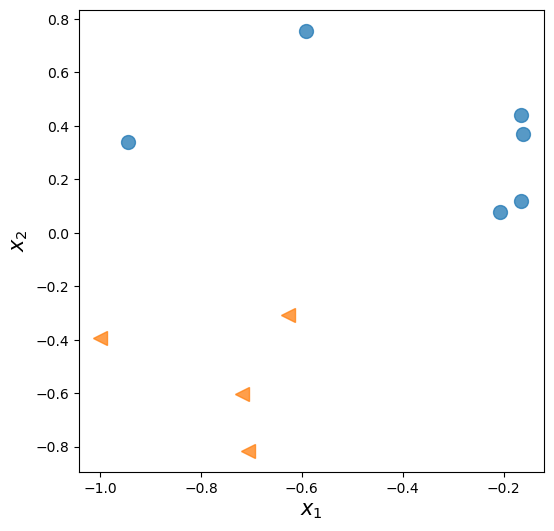

In [72]:
import matplotlib.pyplot as plt
import numpy as np

torch.manual_seed(1)
np.random.seed(1)
x = np.random.uniform(low=-1, high=1, size=(10, 2))
y = np.ones(len(x))
y[x[:, 0] * x[:, 1]<0] = 0

n_train = 6
x_train = torch.tensor(x[:n_train, :], dtype=torch.float32)
y_train = torch.tensor(y[:n_train], dtype=torch.float32)
x_valid = torch.tensor(x[n_train:, :], dtype=torch.float32)
y_valid = torch.tensor(y[n_train:], dtype=torch.float32)

fig = plt.figure(figsize=(6, 6))
plt.plot(x[y==0, 0], x[y==0, 1], 'o', alpha=0.75, markersize=10)
plt.plot(x[y==1, 0], x[y==1, 1], '<', alpha=0.75, markersize=10)
plt.xlabel(r'$x_1$', size=15)
plt.ylabel(r'$x_2$', size=15)
plt.show()

In [73]:
x, x[y==0, 0]

(array([[-0.166,  0.441],
        [-1.   , -0.395],
        [-0.706, -0.815],
        [-0.627, -0.309],
        [-0.206,  0.078],
        [-0.162,  0.37 ],
        [-0.591,  0.756],
        [-0.945,  0.341],
        [-0.165,  0.117],
        [-0.719, -0.604]]),
 array([-0.166, -0.206, -0.162, -0.591, -0.945, -0.165]))

In [74]:
y, y==0

(array([0., 1., 1., 1., 0., 0., 0., 0., 0., 1.]),
 array([ True, False, False, False,  True,  True,  True,  True,  True,
        False]))

In [75]:
x[[1]]

array([[-1.   , -0.395]])